This notebook was used to generate synthetic data using CTGAN.

In [1]:
# Use this command if you don't have a local copy of ctgan:
# !pip install ctgan

# This command for install from local copy (. specifies cwd)
!pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.9 MB/s eta 0:00:00
     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/731.7 MB 171.4 MB/s eta 0:00:04ERROR: Operation cancelled by user
     ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/731.7 MB 163.1 MB/s eta 0:00:05


In [2]:
from ctgan import CTGAN
import pandas as pd

Some data processing

In [21]:
transactions = pd.read_csv('https://raw.githubusercontent.com/BigTuna08/Banksformer_ecml_2022/main/czech/banksformer/data/tr_by_acct_w_age.csv',
                            parse_dates=['date'])
transactions.head()

,Unnamed: 0,account_id,date,type,operation,amount,balance,k_symbol,client_id,age,datetime
0,149432,1,1995-03-24,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,1,29,1995-03-24
1,157404,1,1995-04-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,4679.0,NaN,1,29,1995-04-13
2,158832,1,1995-04-23,CREDIT,CREDIT IN CASH,12600.0,17279.0,NaN,1,29,1995-04-23
3,162681,1,1995-04-30,CREDIT,NaN,19.2,17298.2,INTEREST CREDITED,1,29,1995-04-30
4,167083,1,1995-05-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,20977.2,NaN,1,29,1995-05-13


In [22]:
target_cols = useful_cols = ['account_id', 'date', 'type', 'operation', 'amount', 'k_symbol']
data = transactions[target_cols]
data.head()

,account_id,date,type,operation,amount,k_symbol
0,1,1995-03-24,CREDIT,CREDIT IN CASH,1000.0,NaN
1,1,1995-04-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,NaN
2,1,1995-04-23,CREDIT,CREDIT IN CASH,12600.0,NaN
3,1,1995-04-30,CREDIT,NaN,19.2,INTEREST CREDITED
4,1,1995-05-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   account_id  1056320 non-null  int64         
 1   date        1056320 non-null  datetime64[ns]
 2   type        1056320 non-null  object        
 3   operation   873206 non-null   object        
 4   amount      1056320 non-null  float64       
 5   k_symbol    574439 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 48.4+ MB


In [24]:
data['k_symbol'] = data['k_symbol'].fillna("") # replace Nan with a string
data.head()

<ipython-input-24-52891aed54b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['k_symbol'] = data['k_symbol'].fillna("") # replace Nan with a string


,account_id,date,type,operation,amount,k_symbol
0,1,1995-03-24,CREDIT,CREDIT IN CASH,1000.0,
1,1,1995-04-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,
2,1,1995-04-23,CREDIT,CREDIT IN CASH,12600.0,
3,1,1995-04-30,CREDIT,NaN,19.2,INTEREST CREDITED
4,1,1995-05-13,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,


In [25]:
# split date column into month day year
data.loc[:, 'month'] = pd.to_datetime(data['date']).dt.month
data.loc[:, 'day'] = pd.to_datetime(data['date']).dt.day
data.loc[:, 'year'] = pd.to_datetime(data['date']).dt.year
data = data.drop('date', axis=1)
data.head()

<ipython-input-25-2e07e80a5c50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'month'] = pd.to_datetime(data['date']).dt.month
<ipython-input-25-2e07e80a5c50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'day'] = pd.to_datetime(data['date']).dt.day
<ipython-input-25-2e07e80a5c50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,account_id,type,operation,amount,k_symbol,month,day,year
0,1,CREDIT,CREDIT IN CASH,1000.0,,3,24,1995
1,1,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,,4,13,1995
2,1,CREDIT,CREDIT IN CASH,12600.0,,4,23,1995
3,1,CREDIT,NaN,19.2,INTEREST CREDITED,4,30,1995
4,1,CREDIT,COLLECTION FROM ANOTHER BANK,3679.0,,5,13,1995


## Test CTGAN

Ran CTGAN for 10 epochs as a test

In [17]:
discrete_columns = [
    'type',
    'operation',
    'k_symbol'
]

In [26]:
ctgan = CTGAN(epochs=10)
ctgan.fit(data, discrete_columns)

In [36]:
synthetic_data = ctgan.sample(1000000)

In [37]:
synthetic_data

,account_id,type,operation,amount,k_symbol,month,day,year
0,2099,CREDIT,COLLECTION FROM ANOTHER BANK,6243.550420,OLD AGE PENSION,5,12,1998
1,9572,DEBIT,CASH WITHDRAWAL,43.063921,PAYMENT ON STATEMENT,5,31,1997
2,5212,DEBIT,REMITTANCE TO ANOTHER BANK,3766.163309,HOUSEHOLD,9,6,1998
3,2615,DEBIT,CASH WITHDRAWAL,-54.124175,PAYMENT ON STATEMENT,1,31,1997
4,3684,DEBIT,CASH WITHDRAWAL,15567.344541,,6,5,1998
...,...,...,...,...,...,...,...,...
999995,4181,DEBIT,REMITTANCE TO ANOTHER BANK,6738.628905,,3,13,1998
999996,2318,CREDIT,CREDIT IN CASH,950.952426,,10,5,1998
999997,983,CREDIT,NaN,214.891646,INTEREST CREDITED,12,31,1993
999998,1819,DEBIT,CASH WITHDRAWAL,28.140215,PAYMENT ON STATEMENT,9,30,1996


In [38]:
unique_account_id = synthetic_data['account_id'].nunique()
print(f"Number of unique account_id: {unique_account_id}")

Number of unique account_id: 11914


In [39]:
synthetic_data.to_csv("SyntheticCTGAN.csv")

## Metadata verification


In [2]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.6 MB/s eta 0:00:00
  Using cached ctgan-0.9.1-py3-none-any.whl (24 kB)
  Using cached rdt-1.10.1-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.8 MB/s eta 0:00:00
  Using cached Faker-19.13.0-py3-none-any.whl (1.7 MB)
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 10.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu

In [42]:
# Get metadata
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

In [43]:
metadata.detect_from_dataframe(data)

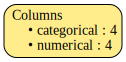

In [44]:
metadata.visualize(
    show_table_details='summarized',
    output_filepath='my_metadata.png'
)

In [45]:
metadata.validate()

## CTGAN Synthesizer

Actual synthetic data generated by running CTGAN synthesizer for 500 epochs on a GPU. Time: 6 hours

In [3]:
from sdv.single_table import CTGANSynthesizer

In [47]:
synthesizer = CTGANSynthesizer(
    metadata,
    enforce_min_max_values = True,
    enforce_rounding=True,
    epochs=500,
    verbose=True
)
synthesizer.fit(data)
synthesizer.get_loss_values()

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:79: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (0.27) | Discrim. (-0.03): 100%|██████████| 500/500 [8:43:12<00:00, 62.78s/it]


,Epoch,Generator Loss,Discriminator Loss
0,0,-0.579650,0.019856
1,1,-0.170839,0.038628
2,2,-0.443179,0.056882
3,3,-0.500305,-0.036978
4,4,-0.295784,-0.142500
...,...,...,...
495,495,-0.220171,-0.015031
496,496,-0.157006,0.141959
497,497,-0.096631,0.224732
498,498,0.032353,-0.016828


In [48]:
synthesizer.save(
    filepath='ctgan_synthesizer.pkl'
)

In [49]:
# prompt: save ctgan_synthesizer.pkl to google drive

from google.colab import drive
drive.mount('/content/gdrive')

!cp ctgan_synthesizer.pkl /content/gdrive/My\ Drive/


Mounted at /content/gdrive


In [5]:
synthesizer = CTGANSynthesizer.load(
    filepath='ctgan_synthesizer.pkl'
)

/usr/local/lib/python3.10/dist-packages/sdv/_utils.py:350: SDV Version Warning: You are currently on SDV version 1.11.0 but this synthesizer was created on version 1.10.0. The latest bug fixes and features may not be available for this synthesizer. To see these enhancements, create and train a new synthesizer on this version.
  warnings.warn(message, SDVVersionWarning)


In [6]:
synthetic_data = synthesizer.sample(1000000)
synthetic_data.to_csv("SyntheticCTGAN.csv")

In [7]:
synthetic_data

,account_id,type,operation,amount,k_symbol,month,day,year
0,1340,DEBIT,REMITTANCE TO ANOTHER BANK,6185.7,INSURANCE PAYMENT,5,5,1998
1,6133,DEBIT,CASH WITHDRAWAL,4873.9,,12,21,1997
2,2700,CREDIT,CREDIT IN CASH,46066.5,,9,18,1997
3,1036,CREDIT,COLLECTION FROM ANOTHER BANK,9288.3,,4,14,1994
4,1436,CREDIT,COLLECTION FROM ANOTHER BANK,5109.8,OLD AGE PENSION,1,5,1998
...,...,...,...,...,...,...,...,...
999995,2115,DEBIT,REMITTANCE TO ANOTHER BANK,2819.4,HOUSEHOLD,8,5,1998
999996,2682,CREDIT,COLLECTION FROM ANOTHER BANK,19732.2,,7,11,1993
999997,288,CREDIT,CREDIT IN CASH,22573.8,,6,12,1997
999998,1237,DEBIT,REMITTANCE TO ANOTHER BANK,1312.1,,10,6,1998


In [8]:
unique_account_id = synthetic_data['account_id'].nunique()
print(f"Number of unique account_id: {unique_account_id}")

Number of unique account_id: 11382
